In [2]:
import open3d as o3d
# 读取PCD文件
pcd = o3d.io.read_point_cloud('1_pcld.pcd')

# 输出点云的一些基本信息
print(pcd)
print("Number of points:", len(pcd.points))

# 可视化点云
o3d.visualization.draw_geometries([pcd])


PointCloud with 16485072 points.
Number of points: 16485072


In [17]:
import numpy as np
import open3d as o3d
# 读取PCD文件
pcd = o3d.io.read_point_cloud('1_pcld.pcd')

# bg x 886, y 2508, x 894 , 2497
# defect x 955, 2522, x 938, 2636

points = np.asarray(pcd.points)

width, height = 2832, 5821
points = points.reshape((height, width, 3))
print(points.shape)
print(points[2508, 886])
print(points[2497, 894])
print("ng....")
print(points[2636, 938])
print(points[2522, 955])

(5821, 2832, 3)
[-16.95999908  80.2559967   51.11800385]
[-16.70400047  79.90399933  51.11000061]
ng....
[-15.29599953  84.35199738  51.2460022 ]
[-14.75199986  80.70400238  51.22200394]


In [15]:
# points[:, :, 2].idxmax()
# points[:,:,2].max()
# points[:,:,2].min()
# points[:, :, 2]

(5821, 2832)

In [2]:
import open3d as o3d
import numpy as np

# 加载点云
# pcd = o3d.io.read_point_cloud("path_to_your_pcd_file.pcd")
pcd = o3d.io.read_point_cloud('1_pcld.pcd')


# 估计点云的法线
pcd.estimate_normals()

# 使用RANSAC平面拟合
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,
                                         ransac_n=3,
                                         num_iterations=1000)

[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

# 计算点云中每个点到平面的距离
distances = np.abs((a * pcd.points[:, 0] +
                    b * pcd.points[:, 1] +
                    c * pcd.points[:, 2] +
                    d) / np.sqrt(a**2 + b**2 + c**2))

# 获取最小和最大距离，即物体的高度
min_distance = np.min(distances)
max_distance = np.max(distances)
height = max_distance - min_distance
print(f"Height of the object: {height:.2f}")

# 可视化平面和点云
inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)

o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])


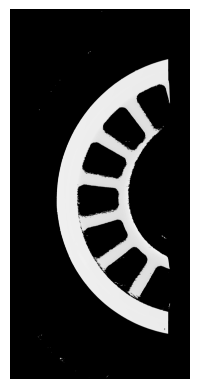

In [14]:
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np

pcd_file_path = "C:/Users/xxkai/Downloads/3.12焊缝高度/不同位置/1_pcld.pcd"

# 读取PCD文件
pcd = o3d.io.read_point_cloud(pcd_file_path)


# 获取点云数据
points = np.asarray(pcd.points)

# 假设我们使用点的z坐标作为深度信息
depths = points[:, 2]

# 将深度信息转换为灰度图
# 首先需要将深度信息转换为0-255的范围
min_depth = np.min(depths)
max_depth = np.max(depths)
gray_depths = (depths - min_depth) * 255 / (max_depth - min_depth)

# 创建灰度图的尺寸
# 这里假设您有一个特定的大小，或者可以根据需要调整

width, height = 2832, 5820
gray_depths = gray_depths[:width * height].reshape(height, width)

# 显示灰度图
plt.imshow(gray_depths, cmap='gray')
plt.axis('off')
plt.show()

# 保存灰度图为图片
plt.imsave('depth_gray_image.png', gray_depths, cmap='gray')


In [16]:
import cv2

# 读取16位图片
image_path = "1_depth.png"

image = cv2.imread(image_path, cv2.IMREAD_ANYDEPTH)

# 选择阈值，例如128
threshold_value = 128

# 应用二值化
_, binary_image = cv2.threshold(image, threshold_value, 65535, cv2.THRESH_BINARY)

# 保存二值化后的图片
output_path = 'binary_image.tif'
cv2.imwrite(output_path, binary_image)

# 如果您想显示图片，可以使用
# cv2.imshow('Binary Image', binary_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

In [58]:
import cv2

# 读取16位图像
image_path = "1_depth.png"

image = cv2.imread(image_path, cv2.IMREAD_ANYDEPTH)

# 设置灰度的最大最小值
min_val = 25000  # 您想要的最小灰度值
max_val = 25900  # 您想要的最大灰度值

# 将16位图像转换为8位灰度图像
# 这里我们使用convertScaleAbs来缩放和转换数据类型
image = np.where(image < min_val, 0, image)
# gray_image = cv2.convertScaleAbs(image, alpha=(255.0/(max_val-min_val)), beta=-min_val*(255.0/(max_val-min_val)))
gray_image = cv2.convertScaleAbs(image, alpha=(255.0/(max_val-min_val)), beta=-min_val*(255.0/(max_val-min_val)))


# 设置背景为黑色
# 假设背景的灰度值较低，我们可以设置一个阈值
threshold_value = 253  # 根据实际情况调整此阈值
gray_image = np.where(gray_image > threshold_value, 0, gray_image)

# 保存灰度图像
output_path = 'gray_image.jpg'
cv2.imwrite(output_path, gray_image)


True

In [57]:
# np.unique(gray_image)

In [63]:
# auto threshold
_, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite('thresh.jpg', thresh)
        

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)  # 根据面积大小进行排序
mask = contours[0]
largest_contour = np.zeros_like(gray_image)
cv2.drawContours(largest_contour, contours, 0, 255, -1)

img_gray_roi = gray_image.copy()
img_mask_roi = cv2.bitwise_and(img_gray_roi, largest_contour)
# img_mask_roi = cv2.bitwise_and(img_gray_roi, img_gray_roi, mask=largest_contour)
cv2.imwrite('mask.jpg', img_mask_roi)

value, thresh_2 = cv2.threshold(img_mask_roi[img_mask_roi > 0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite('thresh_2.jpg', thresh_2)
_, img_mask_binary = cv2.threshold(img_mask_roi, value, 255, cv2.THRESH_BINARY)

cv2.imwrite('contour.jpg', img_mask_binary)


True

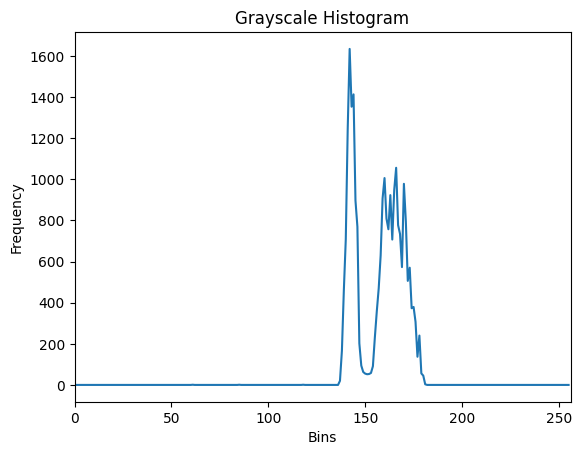

In [70]:

import cv2
import matplotlib.pyplot as plt

# 读取图片
image_path = 'test.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 计算直方图
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 绘制直方图
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.plot(hist)
plt.show()


In [87]:
# auto threshold
# gray_image = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
# _, thresh = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# _, thresh = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)
# cv2.imwrite('thresh.jpg', thresh)


# 读取图像
image_path = 'test.png'
image_path = 'mask.jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# 转换为灰度图像
# 使用Sobel算子进行边缘检测
# 这里使用了x和y方向的Sobel算子
# 参数包括图像、x方向的梯度、y方向的梯度、梯度大小、方向、边缘检测的阈值
gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x)
# 应用阈值进行二值化
_, binary_image = cv2.threshold(gradient_magnitude, 30, 255, cv2.THRESH_BINARY)
binary_image = binary_image.astype(np.uint8)
# 查找轮廓
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# 初始化一个列表来存储轮廓特征
contours_features = []
# 遍历所有轮廓
for contour in contours:
    # 计算轮廓的面积
    area = cv2.contourArea(contour)
    
    # 忽略小区域
    if area < 500:
        continue
    
    # 计算轮廓的近似（如使用最小边界框）
    x, y, w, h = cv2.boundingRect(contour)
    
    # 添加轮廓特征到列表
    contours_features.append({
        'area': area,
        'bounding_box': (x, y, w, h)
    })
# 打印或处理轮廓特征
for feature in contours_features:
    print(feature)


{'area': 1698570.0, 'bounding_box': (727, 847, 1770, 4258)}


In [77]:

# 读取图像
image_path = 'test.png'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# 转换为灰度图像
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 应用阈值操作进行二值化
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# 查找轮廓
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 初始化一个列表来存储Blob特征
blobs = []

# 遍历所有轮廓
for contour in contours:
    # 计算轮廓的面积
    area = cv2.contourArea(contour)
    
    # 忽略小区域
    if area < 500:
        continue
    
    # 计算轮廓的近似（如使用最小边界框）
    x, y, w, h = cv2.boundingRect(contour)
    
    # 计算质心
    moments = cv2.moments(contour)
    center_x = int(moments['m10'] / moments['m00'])
    center_y = int(moments['m01'] / moments['m00'])
    
    # 添加Blob特征到列表
    blobs.append({
        'area': area,
        'bounding_box': (x, y, w, h),
        'center': (center_x, center_y)
    })

# 打印或处理Blob特征
for blob in blobs:
    print(blob)

# 显示结果
cv2.imwrite('binary_image.jpg', binary_image)


{'area': 24279.5, 'bounding_box': (0, 0, 115, 214), 'center': (57, 106)}


True